#BK Channel nTau plotting issue#
Having problems getting the equation to plot on the same line as plot for NML2 conversion variable plot prodcuced by pynml-channelanalysis. ntau = 0.005/Q10 so calculate ntau:

In [5]:
q10 = (3**((35 - 17.350264793)/10))
ntau = 0.005/q10
print ntau

0.000719223093339


Compare with values in file:

In [7]:
#load python packages
%pylab inline
import pandas as pd

#load data
ntau = pd.read_csv('BK_IAMC_ChannelML.n.tau.lems.35.dat', header=None, delim_whitespace=True)
print ntau.head()

Populating the interactive namespace from numpy and matplotlib
          0         1
0  0.000000  0.000719
1  0.000003  0.000719
2  0.000005  0.000719
3  0.000007  0.000719
4  0.000010  0.000719


Value in file and calculated values are ~ the same (probably the value is being rounded and is the same, so plot:

Populating the interactive namespace from numpy and matplotlib


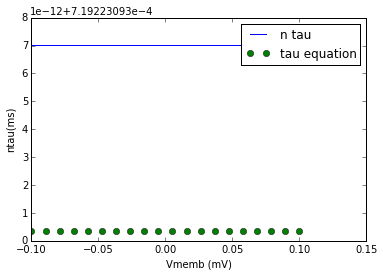

In [2]:
#load python packages
%pylab inline
import pandas as pd

#load data
ntau = pd.read_csv('BK_IAMC_ChannelML.n.tau.lems.35.dat', header=None, delim_whitespace=True)
vm = pd.read_csv('BK_IAMC_ChannelML.rampV.lems.35.dat', header=None, delim_whitespace=True)

#load equations
q10 = (3**((35 - 17.350264793)/10))
v = np.linspace(-0.100, 0.100, 20)
ntaue = np.array([0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005])
ntaueq = ntaue/q10

#SI units so don't convert to physiological units
#vm[1] = vm[1]*1000
#ntau[1] = ntau[1]*1000

#plot Gate Variables
plt.plot(vm[1], ntau[1], v, ntaueq, 'o')
#plt.title('BK ntau Gate Variable')
plt.ylabel('ntau(ms)')
plt.xlabel('Vmemb (mV)')
#plt.legend(['n tau'], loc='upper right')
plt.legend(['n tau', 'tau equation'], loc='upper right')

Calculated (equation) values are plotting at the right position on the y axis, while the file values are being plotted at 10,000 times the value. There is a header on the graph that says 1e-12+7.19223093e-4, no idea what this means. On a Google search I found this ax.get_xaxis().get_major_formatter().set_useOffset(False) so will try.

Populating the interactive namespace from numpy and matplotlib


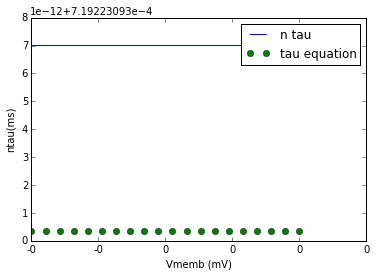

In [12]:
#load python packages
%pylab inline
import pandas as pd

#load data
ntau = pd.read_csv('BK_IAMC_ChannelML.n.tau.lems.35.dat', header=None, delim_whitespace=True)
vm = pd.read_csv('BK_IAMC_ChannelML.rampV.lems.35.dat', header=None, delim_whitespace=True)

#load equations
q10 = (3**((35 - 17.350264793)/10))
v = np.linspace(-0.100, 0.100, 20)
ntaue = np.array([0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005, 0.005])
ntaueq = ntaue/q10

#SI units so don't convert to physiological units
#vm[1] = vm[1]*1000
#ntau[1] = ntau[1]*1000

#plot Gate Variables
plt.plot(vm[1], ntau[1], v, ntaueq, 'o')
#plt.title('BK ntau Gate Variable')
plt.ylabel('ntau(ms)')
plt.xlabel('Vmemb (mV)')
ax = plt.gca()
ax.get_xaxis().get_major_formatter().set_useOffset(False)
#plt.legend(['n tau'], loc='upper right')
plt.legend(['n tau', 'tau equation'], loc='upper right')

That did not work... have tried others like ax.get_xaxis().get_major_formatter().set_scientific(False) that also did not work will search a bit more...